# MTH-IDS: A Multi-Tiered Hybrid Intrusion Detection System for Internet of Vehicles
This is the code for the paper entitled "[**MTH-IDS: A Multi-Tiered Hybrid Intrusion Detection System for Internet of Vehicles**](https://arxiv.org/pdf/2105.13289.pdf)" accepted in IEEE Internet of Things Journal.  
Authors: Li Yang (liyanghart@gmail.com), Abdallah Moubayed, and Abdallah Shami  
Organization: The Optimized Computing and Communications (OC2) Lab, ECE Department, Western University

If you find this repository useful in your research, please cite:  
L. Yang, A. Moubayed, and A. Shami, “MTH-IDS: A Multi-Tiered Hybrid Intrusion Detection System for Internet of Vehicles,” IEEE Internet of Things Journal, vol. 9, no. 1, pp. 616-632, Jan.1, 2022.

## Import libraries ----- ADDED SOME IMPORTS 4371 -----

In [1]:
# Uninstall NumPy if it's already installed
!pip uninstall numpy -y

# Restrict NumPy to version 1.26.4
!pip install numpy==1.26.4

# Install core dependencies
!pip install pandas seaborn matplotlib scipy

# Machine learning libraries
!pip install scikit-learn xgboost imbalanced-learn

# Hyperparameter optimization libraries
!pip install hyperopt scikit-optimize

# Install custom module FCBF from GitHub
!pip install git+https://github.com/SantiagoEG/FCBF_module.git


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
  Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl (15.8 MB)
  Cloning https://github.com/SantiagoEG/FCBF_module.git to c:\users\logan\appdata\local\temp\pip-req-build-7jh4eo5i
  Resolved https://github.com/SantiagoEG/FCBF_module.git to commit 092b60b65ee6ceaf9b0227d12b575f2a3336b287


  Running command git clone --filter=blob:none --quiet https://github.com/SantiagoEG/FCBF_module.git 'C:\Users\logan\AppData\Local\Temp\pip-req-build-7jh4eo5i'
ERROR: git+https://github.com/SantiagoEG/FCBF_module.git does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance

# Isolation Forest Import -- 4371
from sklearn.ensemble import IsolationForest

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import mutual_info_classif
from FCBF_module import FCBF, FCBFK

from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score,
    ConfusionMatrixDisplay
)

## Read the sampled CICIDS2017 dataset
The CICIDS2017 dataset is publicly available at: https://www.unb.ca/cic/datasets/ids-2017.html  
Due to the large size of this dataset, the sampled subsets of CICIDS2017 is used. The subsets are in the "data" folder.  
If you want to use this code on other datasets (e.g., CAN-intrusion dataset), just change the dataset name and follow the same steps. The models in this code are generic models that can be used in any intrusion detection/network traffic datasets.

In [4]:
#Read dataset
df = pd.read_csv('./data/CICIDS2017_sample.csv') 
# The results in this code is based on the original CICIDS2017 dataset. Please go to cell [21] if you work on the sampled dataset. 

In [5]:
df

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,4,2,0,37,0,31,6,18.500000,17.677670,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,142377,46,62,1325,105855,570,0,28.804348,111.407285,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,118873,23,28,1169,45025,570,0,50.826087,156.137367,2896,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,143577,43,55,1301,107289,570,0,30.255814,115.178969,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,143745,49,59,1331,110185,570,0,27.163265,108.067176,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56656,234,2,2,64,232,32,32,32.000000,0.000000,116,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
56657,133288,2,2,94,482,47,47,47.000000,0.000000,241,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
56658,11507694,5,4,450,3525,450,0,90.000000,201.246118,3525,...,32,893.0,0.0,893,893,6503640.0,0.0,6503640,6503640,DoS
56659,11507707,8,6,416,11632,416,0,52.000000,147.078211,5792,...,32,897.0,0.0,897,897,6503122.0,0.0,6503122,6503122,DoS


In [6]:
df.Label.value_counts()

Label
BENIGN          22731
DoS             19035
PortScan         7946
BruteForce       2767
WebAttack        2180
Bot              1966
Infiltration       36
Name: count, dtype: int64

### Preprocessing (normalization and padding values)

In [7]:
# Z-score normalization
features = df.dtypes[df.dtypes != 'object'].index
df[features] = df[features].apply(
    lambda x: (x - x.mean()) / (x.std()))
# Fill empty values by 0
df = df.fillna(0)

### Data sampling
Due to the space limit of GitHub files and the large size of network traffic data, we sample a small-sized subset for model learning using **k-means cluster sampling**

In [8]:
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])

In [9]:
df.Label.value_counts()

Label
0    22731
3    19035
5     7946
2     2767
6     2180
1     1966
4       36
Name: count, dtype: int64

In [10]:
# retain the minority class instances and sample the majority class instances
df_minor = df[(df['Label']==6)|(df['Label']==1)|(df['Label']==4)]
df_major = df.drop(df_minor.index)

In [11]:
X = df_major.drop(['Label'],axis=1) 
y = df_major.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)

In [12]:
# use k-means to cluster the data samples and select a proportion of data from each cluster
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=1000, random_state=0).fit(X)

In [13]:
klabel=kmeans.labels_
df_major['klabel']=klabel

In [14]:
df_major['klabel'].value_counts()

klabel
516    454
94     449
648    348
402    345
245    342
      ... 
83       1
945      1
552      1
359      1
90       1
Name: count, Length: 982, dtype: int64

In [15]:
cols = list(df_major)
cols.insert(78, cols.pop(cols.index('Label')))
df_major = df_major.loc[:, cols]

In [16]:
df_major

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,klabel,Label
0,-0.528470,-0.068426,-0.081806,-0.032573,-0.048343,-0.202326,-0.085798,-0.141625,-0.176448,-0.559719,...,-0.109889,-0.081786,-0.128620,-0.094860,-0.458729,-0.137651,-0.466440,-0.442057,748,0
1,-0.524593,0.704878,0.850340,0.027749,0.920410,0.603275,-0.211174,-0.082434,0.240596,1.006302,...,-0.109889,-0.081786,-0.128620,-0.094860,-0.458729,-0.137651,-0.466440,-0.442057,190,0
2,-0.525233,0.300651,0.339163,0.020443,0.363712,0.603275,-0.211174,0.044064,0.439619,0.484295,...,-0.109889,-0.081786,-0.128620,-0.094860,-0.458729,-0.137651,-0.466440,-0.442057,701,0
3,-0.524560,0.652153,0.745098,0.026625,0.933533,0.603275,-0.211174,-0.074097,0.257378,1.006302,...,-0.109889,-0.081786,-0.128620,-0.094860,-0.458729,-0.137651,-0.466440,-0.442057,190,0
4,-0.524555,0.757604,0.805237,0.028030,0.960037,0.603275,-0.211174,-0.091861,0.225734,1.006302,...,-0.109889,-0.081786,-0.128620,-0.094860,-0.458729,-0.137651,-0.466440,-0.442057,190,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56656,-0.528463,-0.068426,-0.051737,-0.031309,-0.046220,-0.200831,0.457498,-0.064078,-0.255104,-0.517901,...,-0.109889,-0.081786,-0.128620,-0.094860,-0.458729,-0.137651,-0.466440,-0.442057,582,0
56657,-0.524840,-0.068426,-0.051737,-0.029904,-0.043932,-0.178412,0.770939,0.022086,-0.255104,-0.472838,...,-0.109889,-0.081786,-0.128620,-0.094860,-0.458729,-0.137651,-0.466440,-0.442057,389,0
56658,-0.215111,-0.015701,-0.021667,-0.013231,-0.016083,0.423920,-0.211174,0.269089,0.640328,0.711051,...,-0.108682,-0.081786,-0.127669,-0.093554,-0.256386,-0.137651,-0.269448,-0.238252,668,3
56659,-0.215111,0.037025,0.008402,-0.014823,0.058109,0.373103,-0.211174,0.050807,0.399311,1.528310,...,-0.108677,-0.081786,-0.127664,-0.093548,-0.256402,-0.137651,-0.269464,-0.238268,601,3


In [17]:
def typicalSampling(group):
    name = group.name
    frac = 0.008
    return group.sample(frac=frac)

result = df_major.groupby(
    'klabel', group_keys=False
).apply(typicalSampling)

In [18]:
result['Label'].value_counts()

Label
0    120
3    118
5     62
2     21
Name: count, dtype: int64

In [19]:
result

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,klabel,Label
21058,-0.528464,-0.068426,-0.051737,-0.030559,-0.047318,-0.188874,0.624667,-0.018124,-0.255104,-0.539531,...,-0.109889,-0.081786,-0.128620,-0.094860,-0.458729,-0.137651,-0.466440,-0.442057,5,0
27006,-0.528467,-0.068426,-0.051737,-0.034119,-0.048233,-0.245670,-0.169382,-0.236405,-0.255104,-0.557556,...,-0.109889,-0.081786,-0.128620,-0.094860,-0.458729,-0.137651,-0.466440,-0.442057,8,0
13231,-0.528468,-0.086001,-0.066771,-0.034306,-0.048288,-0.248659,-0.211174,-0.247894,-0.255104,-0.557556,...,-0.109889,-0.081786,-0.128620,-0.094860,-0.458729,-0.137651,-0.466440,-0.442057,12,5
28870,2.620675,0.283076,0.203852,0.000866,-0.006245,0.299867,-0.211174,-0.051806,0.148439,-0.037712,...,-0.046594,0.149162,0.169025,-0.061131,-0.147606,-0.136414,-0.163545,-0.128730,15,0
49227,1.753040,0.001874,-0.006633,0.508732,-0.045259,10.572393,-0.211174,10.852874,13.656874,-0.442556,...,-0.093707,-0.081786,-0.115870,-0.077350,2.142253,-0.137651,2.065763,2.177728,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50713,2.159022,0.019450,0.008402,-0.017352,0.057771,0.283426,-0.211174,0.049166,0.341993,2.050317,...,-0.108535,-0.081786,-0.127552,-0.093394,2.608936,-0.137651,2.520105,2.647785,986,3
34770,-0.416725,-0.015701,-0.066771,-0.028545,-0.047922,-0.179907,-0.211174,-0.106585,-0.151536,-0.543136,...,-0.109889,-0.081786,-0.128620,-0.094860,-0.458729,-0.137651,-0.466440,-0.442057,990,0
11123,-0.528468,-0.086001,-0.066771,-0.034212,-0.048288,-0.245670,-0.169382,-0.236405,-0.255104,-0.557556,...,-0.109889,-0.081786,-0.128620,-0.094860,-0.458729,-0.137651,-0.466440,-0.442057,993,5
9236,-0.528468,-0.086001,-0.066771,-0.034212,-0.048288,-0.245670,-0.169382,-0.236405,-0.255104,-0.557556,...,-0.109889,-0.081786,-0.128620,-0.094860,-0.458729,-0.137651,-0.466440,-0.442057,998,5


## 4371 Had to modify the file below because the recommended way to combine DataFrames in recent versions of pandas is by using the pandas.concat() function

In [20]:
import pandas as pd

# Assuming 'result' and 'df_minor' are already defined and loaded

# No need to drop 'klabel' since it doesn't exist
# If you need to drop another column, ensure it exists
# For example, to drop 'Label' (only if intended, which is usually not the case):
# result = result.drop(['Label'], axis=1)

# Concatenate 'result' and 'df_minor' DataFrames
result = pd.concat([result, df_minor], ignore_index=True)

print("DataFrames concatenated successfully.")
print("Updated DataFrame head:")
print(result.head())

DataFrames concatenated successfully.
Updated DataFrame head:
   Flow Duration  Total Fwd Packets  Total Backward Packets  \
0      -0.528464          -0.068426               -0.051737   
1      -0.528467          -0.068426               -0.051737   
2      -0.528468          -0.086001               -0.066771   
3       2.620675           0.283076                0.203852   
4       1.753040           0.001874               -0.006633   

   Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                    -0.030559                    -0.047318   
1                    -0.034119                    -0.048233   
2                    -0.034306                    -0.048288   
3                     0.000866                    -0.006245   
4                     0.508732                    -0.045259   

   Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
0              -0.188874               0.624667               -0.018124   
1              -0.245670      

In [21]:
result.to_csv('./data/CICIDS2017_sample_km.csv',index=0)

### split train set and test set

In [22]:
# Read the sampled dataset
df=pd.read_csv('./data/CICIDS2017_sample_km.csv')
print(df.isnull().sum())

Flow Duration                     0
Total Fwd Packets                 0
Total Backward Packets            0
Total Length of Fwd Packets       0
Total Length of Bwd Packets       0
                               ... 
Idle Std                          0
Idle Max                          0
Idle Min                          0
klabel                         4182
Label                             0
Length: 79, dtype: int64


## ----- ADDED LINES BELOW 4371 TO FIX ISSUE WITH ValueError: Input X contains NaN. ------

In [23]:
from sklearn.impute import SimpleImputer

# Create an imputer object with the desired strategy (mean, median, most_frequent)
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the DataFrame
df[df.columns] = imputer.fit_transform(df)

# fixed the issue by using SimpleImputer to replace the NaN values in your dataset with 
# meaningful statistical estimates (like the mean of each feature column). This transformation eliminated missing 
# values from the dataset, which allowed mutual_info_classif to execute without errors.

In [24]:
X = df.drop(['Label'],axis=1).values
y = df.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

## Feature engineering

### Feature selection by information gain

In [26]:
from sklearn.feature_selection import mutual_info_classif
importances = mutual_info_classif(X_train, y_train)

In [27]:
# calculate the sum of importance scores
f_list = sorted(zip(map(lambda x: round(x, 4), importances), features), reverse=True)
Sum = 0
fs = []
for i in range(0, len(f_list)):
    Sum = Sum + f_list[i][0]
    fs.append(f_list[i][1])

In [28]:
# select the important features from top to bottom until the accumulated importance reaches 90%
f_list2 = sorted(zip(map(lambda x: round(x, 4), importances/Sum), features), reverse=True)
Sum2 = 0
fs = []
for i in range(0, len(f_list2)):
    Sum2 = Sum2 + f_list2[i][0]
    fs.append(f_list2[i][1])
    if Sum2>=0.9:
        break        

In [29]:
X_fs = df[fs].values

In [30]:
X_fs.shape

(4503, 42)

### Feature selection by Fast Correlation Based Filter (FCBF)

The module is imported from the GitHub repo: https://github.com/SantiagoEG/FCBF_module

In [31]:
from FCBF_module import FCBF, FCBFK, FCBFiP, get_i
fcbf = FCBFK(k = 20)
#fcbf.fit(X_fs, y)

In [32]:
X_fss = fcbf.fit_transform(X_fs,y)

In [33]:
X_fss.shape

(4503, 20)

### Re-split train & test sets after feature selection

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_fss,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [35]:
X_train.shape

(3602, 20)

In [36]:
pd.Series(y_train).value_counts()

6.0    1744
1.0    1573
0.0      96
3.0      94
5.0      49
4.0      29
2.0      17
Name: count, dtype: int64

### SMOTE to solve class-imbalance

In [37]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={2:1000,4:1000})

In [38]:
X_train, y_train = smote.fit_resample(X_train, y_train)

In [39]:
pd.Series(y_train).value_counts()

6.0    1744
1.0    1573
4.0    1000
2.0    1000
0.0      96
3.0      94
5.0      49
Name: count, dtype: int64

## Machine learning model training

### Training four base learners: decision tree, random forest, extra trees, XGBoost

#### Apply XGBoost

Accuracy of XGBoost: 0.9889012208657048
Precision of XGBoost: 0.9897151313355531
Recall of XGBoost: 0.9889012208657048
F1-score of XGBoost: 0.9885772773536191
              precision    recall  f1-score   support

         0.0       1.00      0.75      0.86        24
         1.0       0.99      1.00      0.99       393
         2.0       0.67      1.00      0.80         4
         3.0       1.00      0.92      0.96        24
         4.0       1.00      0.86      0.92         7
         5.0       1.00      1.00      1.00        13
         6.0       0.99      1.00      1.00       436

    accuracy                           0.99       901
   macro avg       0.95      0.93      0.93       901
weighted avg       0.99      0.99      0.99       901



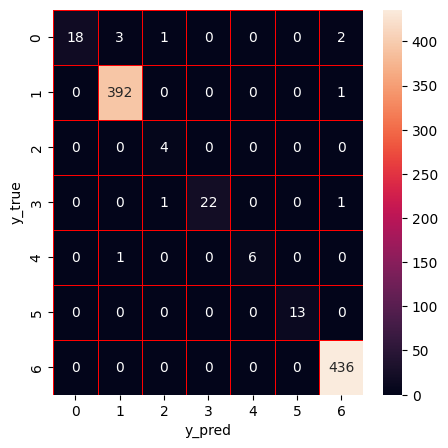

In [40]:
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### Hyperparameter optimization (HPO) of XGBoost using Bayesian optimization with tree-based Parzen estimator (BO-TPE)
Based on the GitHub repo for HPO: https://github.com/LiYangHart/Hyperparameter-Optimization-of-Machine-Learning-Algorithms

In [41]:
!pip install hyperopt

In [42]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']), 
        'max_depth': int(params['max_depth']),
        'learning_rate':  abs(float(params['learning_rate'])),

    }
    clf = xgb.XGBClassifier( **params)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    return {'loss':-score, 'status': STATUS_OK }

space = {
    'n_estimators': hp.quniform('n_estimators', 10, 100, 5),
    'max_depth': hp.quniform('max_depth', 4, 100, 1),
    'learning_rate': hp.normal('learning_rate', 0.01, 0.9),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("XGBoost: Hyperopt estimated optimum {}".format(best))

100%|███████████████████████| 20/20 [00:03<00:00,  6.50trial/s, best loss: -0.9944506104328524]
XGBoost: Hyperopt estimated optimum {'learning_rate': -0.2919186862316151, 'max_depth': 6.0, 'n_estimators': 85.0}


Accuracy of XGBoost: 0.9911209766925638
Precision of XGBoost: 0.9919157617688795
Recall of XGBoost: 0.9911209766925638
F1-score of XGBoost: 0.9908265745248531
              precision    recall  f1-score   support

         0.0       1.00      0.75      0.86        24
         1.0       0.99      1.00      0.99       393
         2.0       0.67      1.00      0.80         4
         3.0       1.00      0.96      0.98        24
         4.0       1.00      0.86      0.92         7
         5.0       1.00      1.00      1.00        13
         6.0       1.00      1.00      1.00       436

    accuracy                           0.99       901
   macro avg       0.95      0.94      0.94       901
weighted avg       0.99      0.99      0.99       901



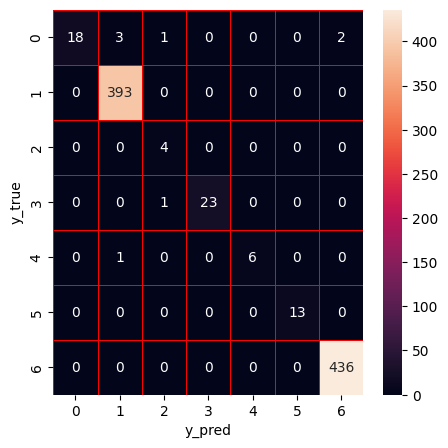

In [43]:
xg = xgb.XGBClassifier(learning_rate= 0.7340229699980686, n_estimators = 70, max_depth = 14)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [44]:
xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)

#### Apply RF

Accuracy of RF: 0.9911209766925638
Precision of RF: 0.9909908103642919
Recall of RF: 0.9911209766925638
F1-score of RF: 0.9909011327681027
              precision    recall  f1-score   support

         0.0       0.95      0.83      0.89        24
         1.0       0.99      1.00      1.00       393
         2.0       0.75      0.75      0.75         4
         3.0       0.96      0.96      0.96        24
         4.0       1.00      0.86      0.92         7
         5.0       1.00      1.00      1.00        13
         6.0       0.99      1.00      1.00       436

    accuracy                           0.99       901
   macro avg       0.95      0.91      0.93       901
weighted avg       0.99      0.99      0.99       901



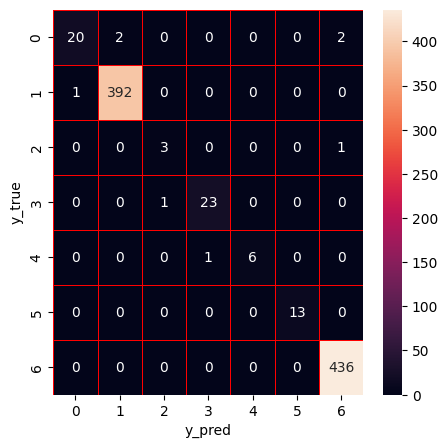

In [45]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train) 
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### Hyperparameter optimization (HPO) of random forest using Bayesian optimization with tree-based Parzen estimator (BO-TPE)
Based on the GitHub repo for HPO: https://github.com/LiYangHart/Hyperparameter-Optimization-of-Machine-Learning-Algorithms

In [46]:
# Hyperparameter optimization of random forest
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']), 
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = RandomForestClassifier( **params)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("Random Forest: Hyperopt estimated optimum {}".format(best))

100%|███████████████████████| 20/20 [00:29<00:00,  1.49s/trial, best loss: -0.9911209766925638]
Random Forest: Hyperopt estimated optimum {'criterion': 1, 'max_depth': 19.0, 'max_features': 11.0, 'min_samples_leaf': 1.0, 'min_samples_split': 3.0, 'n_estimators': 90.0}


Accuracy of RF: 0.9877913429522752
Precision of RF: 0.98791028977778
Recall of RF: 0.9877913429522752
F1-score of RF: 0.9876493777151456
              precision    recall  f1-score   support

         0.0       0.90      0.79      0.84        24
         1.0       0.99      0.99      0.99       393
         2.0       0.60      0.75      0.67         4
         3.0       0.96      0.92      0.94        24
         4.0       1.00      0.86      0.92         7
         5.0       1.00      1.00      1.00        13
         6.0       0.99      1.00      1.00       436

    accuracy                           0.99       901
   macro avg       0.92      0.90      0.91       901
weighted avg       0.99      0.99      0.99       901



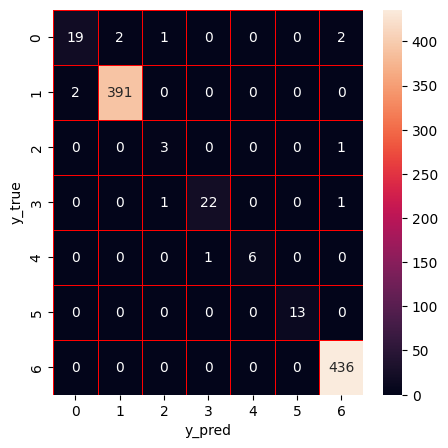

In [47]:
rf_hpo = RandomForestClassifier(n_estimators = 71, min_samples_leaf = 1, max_depth = 46, min_samples_split = 9, max_features = 20, criterion = 'entropy')
rf_hpo.fit(X_train,y_train)
rf_score=rf_hpo.score(X_test,y_test)
y_predict=rf_hpo.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [48]:
rf_train=rf_hpo.predict(X_train)
rf_test=rf_hpo.predict(X_test)

#### Apply DT

Accuracy of DT: 0.9933407325194229
Precision of DT: 0.9932556042966862
Recall of DT: 0.9933407325194229
F1-score of DT: 0.9932370693473405
              precision    recall  f1-score   support

         0.0       0.95      0.88      0.91        24
         1.0       0.99      1.00      1.00       393
         2.0       0.75      0.75      0.75         4
         3.0       1.00      0.96      0.98        24
         4.0       1.00      1.00      1.00         7
         5.0       1.00      1.00      1.00        13
         6.0       1.00      1.00      1.00       436

    accuracy                           0.99       901
   macro avg       0.96      0.94      0.95       901
weighted avg       0.99      0.99      0.99       901



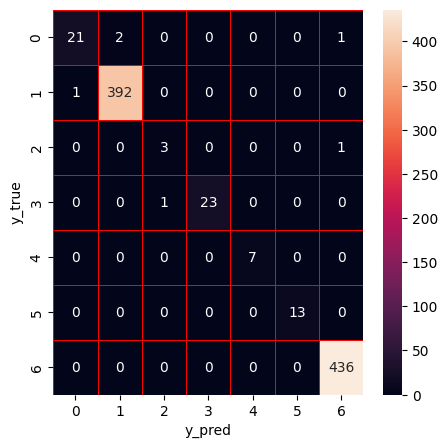

In [49]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train) 
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### Hyperparameter optimization (HPO) of decision tree using Bayesian optimization with tree-based Parzen estimator (BO-TPE)
Based on the GitHub repo for HPO: https://github.com/LiYangHart/Hyperparameter-Optimization-of-Machine-Learning-Algorithms

In [50]:
# Hyperparameter optimization of decision tree
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = DecisionTreeClassifier( **params)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50)
print("Decision tree: Hyperopt estimated optimum {}".format(best))

100%|███████████████████████| 50/50 [00:01<00:00, 41.00trial/s, best loss: -0.9911209766925638]
Decision tree: Hyperopt estimated optimum {'criterion': 0, 'max_depth': 35.0, 'max_features': 15.0, 'min_samples_leaf': 1.0, 'min_samples_split': 11.0}


Accuracy of DT: 0.9922308546059934
Precision of DT: 0.9923665797219973
Recall of DT: 0.9922308546059934
F1-score of DT: 0.9922398611376024
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90        24
         1.0       0.99      0.99      0.99       393
         2.0       0.75      0.75      0.75         4
         3.0       1.00      0.92      0.96        24
         4.0       1.00      1.00      1.00         7
         5.0       1.00      1.00      1.00        13
         6.0       1.00      1.00      1.00       436

    accuracy                           0.99       901
   macro avg       0.95      0.94      0.94       901
weighted avg       0.99      0.99      0.99       901



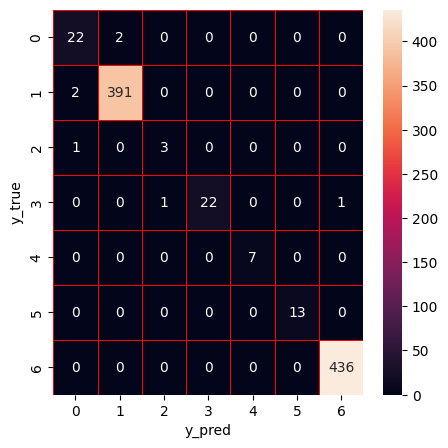

In [51]:
dt_hpo = DecisionTreeClassifier(min_samples_leaf = 2, max_depth = 47, min_samples_split = 3, max_features = 19, criterion = 'gini')
dt_hpo.fit(X_train,y_train)
dt_score=dt_hpo.score(X_test,y_test)
y_predict=dt_hpo.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [52]:
dt_train=dt_hpo.predict(X_train)
dt_test=dt_hpo.predict(X_test)

#### Apply ET

Accuracy of ET: 0.9922308546059934
Precision of ET: 0.9921006882777215
Recall of ET: 0.9922308546059934
F1-score of ET: 0.9920418910817421
              precision    recall  f1-score   support

         0.0       0.95      0.83      0.89        24
         1.0       0.99      1.00      1.00       393
         2.0       1.00      1.00      1.00         4
         3.0       1.00      0.96      0.98        24
         4.0       0.86      0.86      0.86         7
         5.0       1.00      1.00      1.00        13
         6.0       0.99      1.00      1.00       436

    accuracy                           0.99       901
   macro avg       0.97      0.95      0.96       901
weighted avg       0.99      0.99      0.99       901



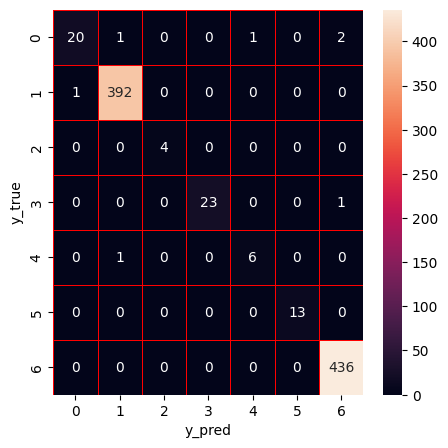

In [53]:
et = ExtraTreesClassifier(random_state = 0)
et.fit(X_train,y_train) 
et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### Hyperparameter optimization (HPO) of extra trees using Bayesian optimization with tree-based Parzen estimator (BO-TPE)
Based on the GitHub repo for HPO: https://github.com/LiYangHart/Hyperparameter-Optimization-of-Machine-Learning-Algorithms

In [54]:
# Hyperparameter optimization of extra trees
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']), 
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = ExtraTreesClassifier( **params)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("Random Forest: Hyperopt estimated optimum {}".format(best))

100%|███████████████████████| 20/20 [00:05<00:00,  3.77trial/s, best loss: -0.9933407325194229]
Random Forest: Hyperopt estimated optimum {'criterion': 1, 'max_depth': 27.0, 'max_features': 14.0, 'min_samples_leaf': 1.0, 'min_samples_split': 4.0, 'n_estimators': 199.0}


Accuracy of ET: 0.9944506104328524
Precision of ET: 0.9944719855742173
Recall of ET: 0.9944506104328524
F1-score of ET: 0.9943331721450756
              precision    recall  f1-score   support

         0.0       1.00      0.88      0.93        24
         1.0       0.99      1.00      1.00       393
         2.0       1.00      1.00      1.00         4
         3.0       1.00      0.96      0.98        24
         4.0       0.86      0.86      0.86         7
         5.0       1.00      1.00      1.00        13
         6.0       1.00      1.00      1.00       436

    accuracy                           0.99       901
   macro avg       0.98      0.96      0.97       901
weighted avg       0.99      0.99      0.99       901



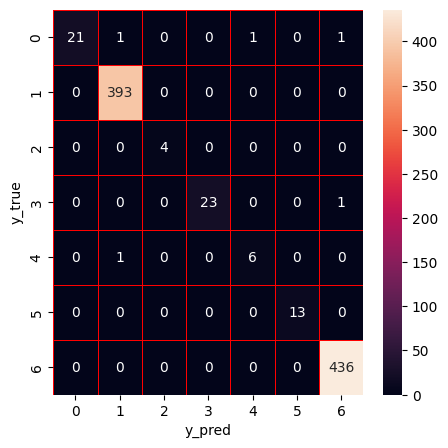

In [55]:
et_hpo = ExtraTreesClassifier(n_estimators = 53, min_samples_leaf = 1, max_depth = 31, min_samples_split = 5, max_features = 20, criterion = 'entropy')
et_hpo.fit(X_train,y_train) 
et_score=et_hpo.score(X_test,y_test)
y_predict=et_hpo.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [56]:
et_train=et_hpo.predict(X_train)
et_test=et_hpo.predict(X_test)

### Apply Stacking
The ensemble model that combines the four ML models (DT, RF, ET, XGBoost)

In [57]:
base_predictions_train = pd.DataFrame( {
    'DecisionTree': dt_train.ravel(),
        'RandomForest': rf_train.ravel(),
     'ExtraTrees': et_train.ravel(),
     'XgBoost': xg_train.ravel(),
    })
base_predictions_train.head(5)

,DecisionTree,RandomForest,ExtraTrees,XgBoost
0,0.0,0.0,0.0,0
1,6.0,6.0,6.0,6
2,6.0,6.0,6.0,6
3,6.0,6.0,6.0,6
4,6.0,6.0,6.0,6


In [58]:
dt_train=dt_train.reshape(-1, 1)
et_train=et_train.reshape(-1, 1)
rf_train=rf_train.reshape(-1, 1)
xg_train=xg_train.reshape(-1, 1)
dt_test=dt_test.reshape(-1, 1)
et_test=et_test.reshape(-1, 1)
rf_test=rf_test.reshape(-1, 1)
xg_test=xg_test.reshape(-1, 1)

In [59]:
dt_train.shape

(5556, 1)

In [60]:
x_train = np.concatenate(( dt_train, et_train, rf_train, xg_train), axis=1)
x_test = np.concatenate(( dt_test, et_test, rf_test, xg_test), axis=1)

Accuracy of Stacking: 0.9911209766925638
Precision of Stacking: 0.9910029986660175
Recall of Stacking: 0.9911209766925638
F1-score of Stacking: 0.990703340780075
              precision    recall  f1-score   support

         0.0       0.95      0.75      0.84        24
         1.0       0.99      1.00      1.00       393
         2.0       0.75      0.75      0.75         4
         3.0       1.00      0.96      0.98        24
         4.0       0.88      1.00      0.93         7
         5.0       1.00      1.00      1.00        13
         6.0       1.00      1.00      1.00       436

    accuracy                           0.99       901
   macro avg       0.94      0.92      0.93       901
weighted avg       0.99      0.99      0.99       901



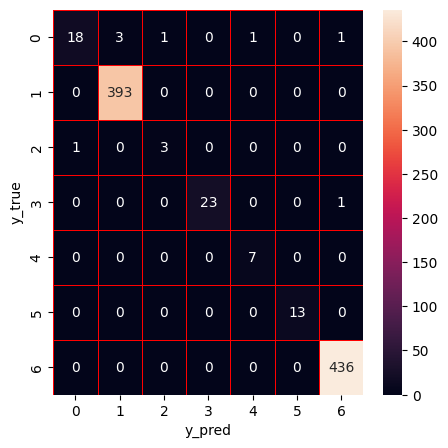

In [61]:
stk = xgb.XGBClassifier().fit(x_train, y_train)
y_predict=stk.predict(x_test)
y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### Hyperparameter optimization (HPO) of the stacking ensemble model (XGBoost) using Bayesian optimization with tree-based Parzen estimator (BO-TPE)
Based on the GitHub repo for HPO: https://github.com/LiYangHart/Hyperparameter-Optimization-of-Machine-Learning-Algorithms

In [62]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']), 
        'max_depth': int(params['max_depth']),
        'learning_rate':  abs(float(params['learning_rate'])),

    }
    clf = xgb.XGBClassifier( **params)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    score = accuracy_score(y_test, y_pred)

    return {'loss':-score, 'status': STATUS_OK }

space = {
    'n_estimators': hp.quniform('n_estimators', 10, 100, 5),
    'max_depth': hp.quniform('max_depth', 4, 100, 1),
    'learning_rate': hp.normal('learning_rate', 0.01, 0.9),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("XGBoost: Hyperopt estimated optimum {}".format(best))

100%|███████████████████████| 20/20 [00:01<00:00, 19.87trial/s, best loss: -0.9911209766925638]
XGBoost: Hyperopt estimated optimum {'learning_rate': -0.5146898745306425, 'max_depth': 58.0, 'n_estimators': 100.0}


Accuracy of XGBoost: 0.9911209766925638
Precision of XGBoost: 0.991439353726426
Recall of XGBoost: 0.9911209766925638
F1-score of XGBoost: 0.990886416334829
              precision    recall  f1-score   support

         0.0       0.95      0.75      0.84        24
         1.0       0.99      1.00      1.00       393
         2.0       0.60      0.75      0.67         4
         3.0       1.00      0.96      0.98        24
         4.0       0.88      1.00      0.93         7
         5.0       1.00      1.00      1.00        13
         6.0       1.00      1.00      1.00       436

    accuracy                           0.99       901
   macro avg       0.92      0.92      0.92       901
weighted avg       0.99      0.99      0.99       901



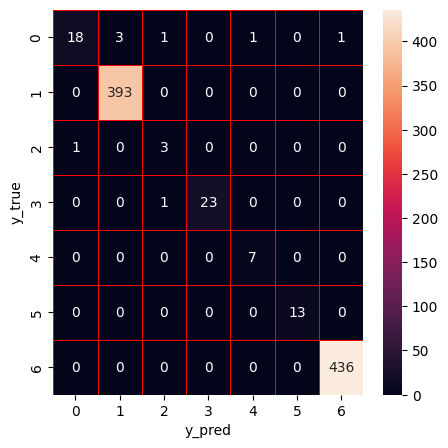

In [63]:
xg = xgb.XGBClassifier(learning_rate= 0.19229249758051492, n_estimators = 30, max_depth = 36)
xg.fit(x_train,y_train)
xg_score=xg.score(x_test,y_test)
y_predict=xg.predict(x_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

## Anomaly-based IDS

### Generate the port-scan datasets for unknown attack detection

In [64]:
df=pd.read_csv('./data/CICIDS2017_sample_km.csv')

In [65]:
df.Label.value_counts()

Label
6    2180
1    1966
0     120
3     118
5      62
4      36
2      21
Name: count, dtype: int64

In [66]:
df1 = df[df['Label'] != 5]
df1['Label'][df1['Label'] > 0] = 1
df1.to_csv('./data/CICIDS2017_sample_km_without_portscan.csv',index=0)

In [67]:
df2 = df[df['Label'] == 5]
df2['Label'][df2['Label'] == 5] = 1
df2.to_csv('./data/CICIDS2017_sample_km_portscan.csv',index=0)

### Read the generated datasets for unknown attack detection

In [68]:
df1 = pd.read_csv('./data/CICIDS2017_sample_km_without_portscan.csv')
df2 = pd.read_csv('./data/CICIDS2017_sample_km_portscan.csv')

In [69]:
features = df1.drop(['Label'],axis=1).dtypes[df1.dtypes != 'object'].index
df1[features] = df1[features].apply(
    lambda x: (x - x.mean()) / (x.std()))
df2[features] = df2[features].apply(
    lambda x: (x - x.mean()) / (x.std()))
df1 = df1.fillna(0)
df2 = df2.fillna(0)

In [70]:
df1.Label.value_counts()

Label
1    4321
0     120
Name: count, dtype: int64

In [71]:
df2.Label.value_counts()

Label
1    62
Name: count, dtype: int64

In [72]:
df2p=df1[df1['Label']==0]
df2pp=df2p.sample(n=None, frac=1255/18225, replace=False, weights=None, random_state=None, axis=0)
df2=pd.concat([df2, df2pp])

In [73]:
df2.Label.value_counts()

Label
1    62
0     8
Name: count, dtype: int64

## ------ FIXED CODE BELOW 4371, This error occurs because the append method has been removed from pandas starting with version 2.0.0. The recommended approach is to use pandas.concat() instead.------

In [74]:
df = pd.concat([df1, df2], ignore_index=True)

In [75]:
X = df.drop(['Label'],axis=1) .values
y = df.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)
pd.Series(y).value_counts()

1    4383
0     128
Name: count, dtype: int64

### Feature engineering (IG, FCBF, and KPCA)

#### Feature selection by information gain (IG)

In [76]:
from sklearn.feature_selection import mutual_info_classif
importances = mutual_info_classif(X, y)

In [77]:
# calculate the sum of importance scores
f_list = sorted(zip(map(lambda x: round(x, 4), importances), features), reverse=True)
Sum = 0
fs = []
for i in range(0, len(f_list)):
    Sum = Sum + f_list[i][0]
    fs.append(f_list[i][1])

In [78]:
# select the important features from top to bottom until the accumulated importance reaches 90%
f_list2 = sorted(zip(map(lambda x: round(x, 4), importances/Sum), features), reverse=True)
Sum2 = 0
fs = []
for i in range(0, len(f_list2)):
    Sum2 = Sum2 + f_list2[i][0]
    fs.append(f_list2[i][1])
    if Sum2>=0.9:
        break        

In [79]:
X_fs = df[fs].values

In [80]:
X_fs.shape

(4511, 42)

In [81]:
X_fs

array([[-0.06682377, -0.06682377, -1.82347114, ..., -0.55960355,
        -0.02419511, -0.05610604],
       [-0.06782845, -0.06782845, -1.8127939 , ..., -0.55960698,
         0.14869218, -0.05610604],
       [-0.05795352, -0.05795352, -1.78788035, ...,  0.89116003,
        -0.21508833, -0.03653539],
       ...,
       [-0.06782845, -0.06782845, -1.8127939 , ..., -0.55960698,
         0.14869218, -0.05610604],
       [-0.06576621, -0.06576621,  0.36892115, ..., -0.54687661,
        -0.21477603, -0.04305894],
       [-0.0660967 , -0.0660967 , -1.36079095, ..., -0.02546673,
        -0.21508646, -0.03653539]])

#### Feature selection by Fast Correlation Based Filter (FCBF)

The module is imported from the GitHub repo: https://github.com/SantiagoEG/FCBF_module

In [82]:
from FCBF_module import FCBF, FCBFK, FCBFiP, get_i
fcbf = FCBFK(k = 20)
#fcbf.fit(X_fs, y)

In [83]:
X_fss = fcbf.fit_transform(X_fs,y)

In [84]:
X_fss.shape

(4511, 20)

In [85]:
X_fss

array([[-1.82347114,  7.27130037,  7.26907391, ..., -0.03623421,
        -0.88732724, -0.03853234],
       [-1.8127939 ,  0.072222  ,  0.0714398 , ..., -0.20589324,
        -0.88725593, -0.25225133],
       [-1.78788035, -0.30667687, -0.30738305, ...,  0.5952546 ,
        -0.81552079,  0.36595962],
       ...,
       [-1.8127939 ,  0.072222  ,  0.0714398 , ..., -0.20589324,
        -0.88725593, -0.25225133],
       [ 0.36892115,  7.27130037,  7.26907391, ...,  0.10967257,
        -0.88732724,  0.01368472],
       [-1.36079095,  0.83001972,  0.82908549, ..., -0.07016601,
        -0.87698768, -0.10829775]])

####  kernel principal component analysis (KPCA)

In [86]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 10, kernel = 'rbf')
kpca.fit(X_fss, y)
X_kpca = kpca.transform(X_fss)

# from sklearn.decomposition import PCA
# kpca = PCA(n_components = 10)
# kpca.fit(X_fss, y)
# X_kpca = kpca.transform(X_fss)

### Train-test split after feature selection

In [87]:
X_train = X_kpca[:len(df1)]
y_train = y[:len(df1)]
X_test = X_kpca[len(df1):]
y_test = y[len(df1):]

### Solve class-imbalance by SMOTE

In [88]:
pd.Series(y_train).value_counts()

1    4321
0     120
Name: count, dtype: int64

## ====== 4371 GROUP ENHANCEMENTS WILL BE IMPLEMENTED BELOW ======

# == Rationale for Implementing 4371 Group Enhancements Here ==

"""
This section introduces advanced anomaly detection models — Isolation Forest, Local Outlier Factor (LOF), 
and One-Class SVM — as enhancements to the Multi-Tiered Hybrid Intrusion Detection System (MTH-IDS). 
We are implementing these enhancements here, directly after the SMOTE-based class-balancing step, 
to ensure that the training data is balanced, which is critical for the effectiveness of anomaly detection models.

### Why Implement Here?
- **Balanced Data**: By placing these enhancements immediately after the data balancing step, we provide a more balanced dataset for our models, which can improve the reliability of outlier detection. Anomaly detection models like Isolation Forest and LOF are sensitive to class imbalance, and a balanced dataset can help them identify rare or unique attack patterns more effectively.
- **Comparative Evaluation**: By positioning these models before the CL-k-means method, we can directly compare the performance of the new anomaly detection algorithms with the existing clustering-based approach, enabling a comprehensive analysis of detection capabilities.
- **Logical Flow**: This location aligns well with the existing flow of the notebook, allowing us to introduce the additional models as part of the overall feature engineering and anomaly detection pipeline.

### What We Hope to Achieve:
1. **Enhanced Detection Capabilities**: Adding these models aims to improve MTH-IDS’s ability to detect both known and unknown types of attacks, particularly those that may be rare or hard to classify.
2. **Reduced False Positives and False Negatives**: The voting mechanism we’ll implement will help aggregate predictions from multiple models, which can reduce the likelihood of false positives and false negatives, improving the overall accuracy and robustness of the system.
3. **Adaptability to Unknown Attacks**: Models like One-Class SVM, which learns the normal behavior of the system, will help in flagging suspicious activities that do not conform to previously observed patterns, making MTH-IDS more adaptable to new and evolving threats.
4. **Optimized Sensitivity**: With threshold optimization, we aim to balance the sensitivity of the IDS, minimizing false alarms while ensuring that actual threats are effectively detected.

In summary, by implementing these enhancements here, we aim to create a more comprehensive and reliable intrusion detection system that can address a wider range of attack patterns, providing a robust solution for network security in the Internet of Vehicles (IoV) environment.
"""
# ===================================================


## ====== END OF ENHANCEMENTS ======

In [89]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={1:18225})
X_train, y_train = smote.fit_resample(X_train, y_train)

In [90]:
pd.Series(y_train).value_counts()

1    18225
0      120
Name: count, dtype: int64

In [91]:
pd.Series(y_test).value_counts()

1    62
0     8
Name: count, dtype: int64

### Apply the cluster labeling (CL) k-means method

In [92]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN,MeanShift
from sklearn.cluster import SpectralClustering,AgglomerativeClustering,AffinityPropagation,Birch,MiniBatchKMeans,MeanShift 
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.metrics import classification_report
from sklearn import metrics

In [93]:
def CL_kmeans(X_train, X_test, y_train, y_test,n,b=100):
    km_cluster = MiniBatchKMeans(n_clusters=n,batch_size=b)
    result = km_cluster.fit_predict(X_train)
    result2 = km_cluster.predict(X_test)

    count=0
    a=np.zeros(n)
    b=np.zeros(n)
    for v in range(0,n):
        for i in range(0,len(y_train)):
            if result[i]==v:
                if y_train[i]==1:
                    a[v]=a[v]+1
                else:
                    b[v]=b[v]+1
    list1=[]
    list2=[]
    for v in range(0,n):
        if a[v]<=b[v]:
            list1.append(v)
        else: 
            list2.append(v)
    for v in range(0,len(y_test)):
        if result2[v] in list1:
            result2[v]=0
        elif result2[v] in list2:
            result2[v]=1
        else:
            print("-1")
    print(classification_report(y_test, result2))
    cm=confusion_matrix(y_test,result2)
    acc=metrics.accuracy_score(y_test,result2)
    print(str(acc))
    print(cm)

In [94]:
CL_kmeans(X_train, X_test, y_train, y_test, 8)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.89      1.00      0.94        62

    accuracy                           0.89        70
   macro avg       0.44      0.50      0.47        70
weighted avg       0.78      0.89      0.83        70

0.8857142857142857
[[ 0  8]
 [ 0 62]]


### Hyperparameter optimization of CL-k-means
Tune "k"

## ----- ADDED LINE BELOW 4371  Python is unable to find the skopt module because it hasn't been installed yet. -----

In [95]:
!pip install numpy
!pip install --upgrade scikit-optimize

In [96]:
import skopt
import numpy as np
np.int = int
print(f"scikit-optimize version: {skopt.__version__}")
print(f"NumPy version: {np.__version__}")

scikit-optimize version: 0.10.2
NumPy version: 1.26.4


In [97]:
#Hyperparameter optimization by BO-GP
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from sklearn import metrics
from sklearn.cluster import MiniBatchKMeans # 4371 ADDED TO FIX ERROR OF minibatchkmeans NOT BEING IMPORTED

space  = [Integer(2, 50, name='n_clusters')]
@use_named_args(space)
def objective(**params):
    km_cluster = MiniBatchKMeans(batch_size=100, **params)
    n=params['n_clusters']
    
    result = km_cluster.fit_predict(X_train)
    result2 = km_cluster.predict(X_test)

    count=0
    a=np.zeros(n)
    b=np.zeros(n)
    for v in range(0,n):
        for i in range(0,len(y_train)):
            if result[i]==v:
                if y_train[i]==1:
                    a[v]=a[v]+1
                else:
                    b[v]=b[v]+1
    list1=[]
    list2=[]
    for v in range(0,n):
        if a[v]<=b[v]:
            list1.append(v)
        else: 
            list2.append(v)
    for v in range(0,len(y_test)):
        if result2[v] in list1:
            result2[v]=0
        elif result2[v] in list2:
            result2[v]=1
        else:
            print("-1")
    cm=metrics.accuracy_score(y_test,result2)
    print(str(n)+" "+str(cm))
    return (1-cm)
from skopt import gp_minimize
import time
t1=time.time()
try:
    res_gp = gp_minimize(objective, space, n_calls=20, random_state=0)
    print("Best score=%.4f" % (1 - res_gp.fun))
    print("Best parameters: n_clusters=%d" % res_gp.x[0])
except Exception as e:
    print(f"An error occurred: {e}")
t2 = time.time()
print(t2 - t1)

30 0.9285714285714286
43 0.7428571428571429
43 0.6857142857142857
43 0.9285714285714286
32 0.8857142857142857
20 0.6857142857142857
16 0.6571428571428571
5 0.8857142857142857
15 0.8857142857142857
25 0.8857142857142857
2 0.8857142857142857
29 0.6857142857142857
42 0.9285714285714286
18 0.8857142857142857
8 0.8857142857142857
28 0.8857142857142857
43 0.8857142857142857
38 0.7857142857142857
17 0.8857142857142857
11 0.6571428571428571
Best score=0.9286
Best parameters: n_clusters=30
6.220282554626465


In [98]:
#Hyperparameter optimization by BO-TPE
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics

def objective(params):
    params = {
        'n_clusters': int(params['n_clusters']), 
    }
    km_cluster = MiniBatchKMeans(batch_size=100, **params)
    n=params['n_clusters']
    
    result = km_cluster.fit_predict(X_train)
    result2 = km_cluster.predict(X_test)

    count=0
    a=np.zeros(n)
    b=np.zeros(n)
    for v in range(0,n):
        for i in range(0,len(y_train)):
            if result[i]==v:
                if y_train[i]==1:
                    a[v]=a[v]+1
                else:
                    b[v]=b[v]+1
    list1=[]
    list2=[]
    for v in range(0,n):
        if a[v]<=b[v]:
            list1.append(v)
        else: 
            list2.append(v)
    for v in range(0,len(y_test)):
        if result2[v] in list1:
            result2[v]=0
        elif result2[v] in list2:
            result2[v]=1
        else:
            print("-1")
    score=metrics.accuracy_score(y_test,result2)
    print(str(params['n_clusters'])+" "+str(score))
    return {'loss':1-score, 'status': STATUS_OK }
space = {
    'n_clusters': hp.quniform('n_clusters', 2, 50, 1),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("Random Forest: Hyperopt estimated optimum {}".format(best))

25 0.8857142857142857                                                                          
11 0.8857142857142857                                                                          
31 0.8857142857142857                                                                          
10 0.8857142857142857                                                                          
21 0.8857142857142857                                                                          
40 0.9285714285714286                                                                          
49 0.6857142857142857                                                                          
47 0.9                                                                                         
46 0.9                                                                                         
47 0.8857142857142857                                                                          
18 0.8857142857142857                   

In [99]:
CL_kmeans(X_train, X_test, y_train, y_test, 16)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.89      1.00      0.94        62

    accuracy                           0.89        70
   macro avg       0.44      0.50      0.47        70
weighted avg       0.78      0.89      0.83        70

0.8857142857142857
[[ 0  8]
 [ 0 62]]


### Apply the CL-k-means model with biased classifiers

In [100]:
# Only a sample code to show the logic. It needs to work on the entire dataset to generate sufficient training samples for biased classifiers
def Anomaly_IDS(X_train, X_test, y_train, y_test,n,b=100):
    # CL-kmeans
    km_cluster = MiniBatchKMeans(n_clusters=n,batch_size=b)
    result = km_cluster.fit_predict(X_train)
    result2 = km_cluster.predict(X_test)

    count=0
    a=np.zeros(n)
    b=np.zeros(n)
    for v in range(0,n):
        for i in range(0,len(y_train)):
            if result[i]==v:
                if y_train[i]==1:
                    a[v]=a[v]+1
                else:
                    b[v]=b[v]+1
    list1=[]
    list2=[]
    for v in range(0,n):
        if a[v]<=b[v]:
            list1.append(v)
        else: 
            list2.append(v)
    for v in range(0,len(y_test)):
        if result2[v] in list1:
            result2[v]=0
        elif result2[v] in list2:
            result2[v]=1
        else:
            print("-1")
    print(classification_report(y_test, result2))
    cm=confusion_matrix(y_test,result2)
    acc=metrics.accuracy_score(y2,result2)
    print(str(acc))
    print(cm)
    
    #Biased classifier construction
    count=0
    print(len(y))
    a=np.zeros(n)
    b=np.zeros(n)
    FNL=[]
    FPL=[]
    for v in range(0,n):
        al=[]
        bl=[]
        for i in range(0,len(y)):   
            if result[i]==v:        
                if y[i]==1:        #label 1
                    a[v]=a[v]+1
                    al.append(i)
                else:             #label 0
                    b[v]=b[v]+1
                    bl.append(i)
        if a[v]<=b[v]:
            FNL.extend(al)
        else:
            FPL.extend(bl)
        #print(str(v)+"="+str(a[v]/(a[v]+b[v])))
        
    dffp=df.iloc[FPL, :]
    dffn=df.iloc[FNL, :]
    dfva0=df[df['Label']==0]
    dfva1=df[df['Label']==1]
    
    dffpp=dfva1.sample(n=None, frac=len(FPL)/dfva1.shape[0], replace=False, weights=None, random_state=None, axis=0)
    dffnp=dfva0.sample(n=None, frac=len(FNL)/dfva0.shape[0], replace=False, weights=None, random_state=None, axis=0)
    
    dffp_f=pd.concat([dffp, dffpp])
    dffn_f=pd.concat([dffn, dffnp])
    
    Xp = dffp_f.drop(['Label'],axis=1)  
    yp = dffp_f.iloc[:, -1].values.reshape(-1,1)
    yp=np.ravel(yp)

    Xn = dffn_f.drop(['Label'],axis=1)  
    yn = dffn_f.iloc[:, -1].values.reshape(-1,1)
    yn=np.ravel(yn)
    
    rfp = RandomForestClassifier(random_state = 0)
    rfp.fit(Xp,yp)
    rfn = RandomForestClassifier(random_state = 0)
    rfn.fit(Xn,yn)

    dffnn_f=pd.concat([dffn, dffnp])
    
    Xnn = dffn_f.drop(['Label'],axis=1)  
    ynn = dffn_f.iloc[:, -1].values.reshape(-1,1)
    ynn=np.ravel(ynn)

    rfnn = RandomForestClassifier(random_state = 0)
    rfnn.fit(Xnn,ynn)

    X2p = df2.drop(['Label'],axis=1) 
    y2p = df2.iloc[:, -1].values.reshape(-1,1)
    y2p=np.ravel(y2p)

    result2 = km_cluster.predict(X2p)

    count=0
    a=np.zeros(n)
    b=np.zeros(n)
    for v in range(0,n):
        for i in range(0,len(y)):
            if result[i]==v:
                if y[i]==1:
                    a[v]=a[v]+1
                else:
                    b[v]=b[v]+1
    list1=[]
    list2=[]
    l1=[]
    l0=[]
    for v in range(0,n):
        if a[v]<=b[v]:
            list1.append(v)
        else: 
            list2.append(v)
    for v in range(0,len(y2p)):
        if result2[v] in list1:
            result2[v]=0
            l0.append(v)
        elif result2[v] in list2:
            result2[v]=1
            l1.append(v)
        else:
            print("-1")
    print(classification_report(y2p, result2))
    cm=confusion_matrix(y2p,result2)
    print(cm)

95% of the code has been shared, and the remaining 5% is retained for future extension.  
Thank you for your interest and more details are in the paper.